### Christian Craig

## Q1 [10]

A drug company would like to introduce a drug to help patients with Alzheimer's. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. 
- The company interviews 100 people and 15 of them say that they will buy the drug. (This the observed data: n=100, observed=15) $->$ likelihood
- If in the past new drugs tend to capture a proportion between say .10 and .40 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(0.10, 0.40)$ $->$ prior

### What is the traceplot of $\theta$ using Bayesian analysis to estimate the market share for the new drug?
- Sample 10000 draws
- Plot the traceplot

In [1]:
!pip install pymc3

In [2]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 43 seconds.
The acceptance probability does not match the target. It is 0.6846422643682012, but should be close to 0.8. Try to increase the number of tuning steps.


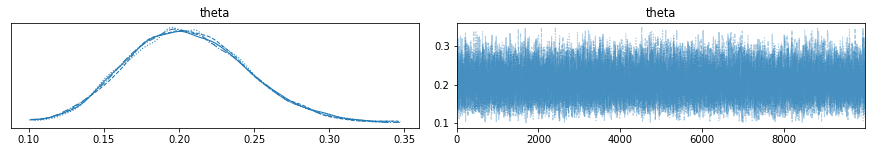

In [3]:
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.10, upper=0.35)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta,n=100,observed=20)

    # Posterior
    # draw 10000 posterior samples
    trace = pm.sample(draws=10000)
    
    pm.traceplot(trace)

Above is the relevant traceplot

### Plot the posterior distribution plot of $ \theta $
- What is the mean posterior value?

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


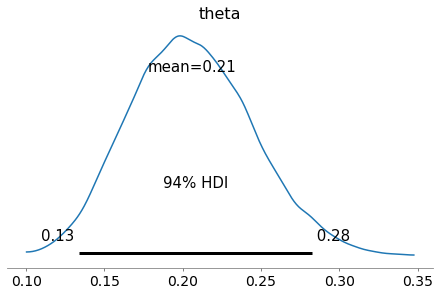

In [4]:
pm.plot_posterior(trace)

The mean posterior value is .21


## Bayesian Network Analysis

In this part we will be analyzing medical diagnosis using Bayes Nets. The structure and the Conditional Probabability Distribution tables are shown in the figure below.

![MedicalDiagnosis](Med-diag-bnet.jpg)

- In the first few questions you will build the Bayes Net, set up the Conditional Probability Distribution tables, and associate the CPDs to the network.   
- These steps are extremely important and crucial. Make sure you do the set up correctly, as everything else depends on that.   

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [6]:
import pgmpy

In [7]:
import sklearn
sklearn.__version__

'0.21.3'

### These are the packages I used

In [8]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

## Q2 [10]

**Define the model structure.** 

You need to define the network by passing a list of edges. 

In [9]:
model = BayesianModel([('Smokes', 'LungDisease'), ('LungDisease', 'ShortnessBreath'), ('LungDisease', 'ChestPain'), ('LungDisease', 'Cough'), ('Cold', 'Cough'), ('Cold', 'Fever')])

In [10]:
#Your code ==> I believe you have given the code, above --- cc
# model = BayesianModel([('Smokes', 'LungDisease'),.........])

## Q3 [15] 

**Define individual CPDs**
- Define the CPDs using the state names of the variables. 

In [11]:
cpd_Smokes = TabularCPD(variable='Smokes', variable_card=2, values=[[0.2], [0.8]], state_names={'Smokes' : ['T', 'F']})
print(cpd_Smokes)


cpd_LungDisease = TabularCPD(variable='LungDisease', 
                             variable_card=2, 
                             values=[[0.1009, 0.001],
                                     [0.8991, 0.999]],
                             evidence=['Smokes'],
                             evidence_card=[2],
                            state_names={'Smokes' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_LungDisease)



+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+
+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [12]:
#under lung disease
cpd_SOB = TabularCPD(variable='ShortnessBreath', 
                             variable_card=2, 
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'LungDisease' : ['T', 'F'],'ShortnessBreath' : ['T', 'F']})

print(cpd_SOB)

cpd_CP = TabularCPD(variable='ChestPain', 
                             variable_card=2, 
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'LungDisease' : ['T', 'F'],'ChestPain' : ['T', 'F']})

print(cpd_CP)

#cold & under cold

cpd_Cold = TabularCPD(variable='Cold', variable_card=2, values=[[0.02], [0.98]], state_names={'Cold' : ['T', 'F']})
print(cpd_Cold)

cpd_Cough = TabularCPD(variable='Cough', variable_card=2, 
                   values=[[0.7525, 0.505,0.505,0.01],
                           [0.2475, 0.495,0.495, 0.99]],
                  evidence=['LungDisease', 'Cold'],
                  evidence_card=[2,2],
                state_names={'LungDisease' : ['T','F'],'Cold' : ['T','F'],'Cough' : ['T','F']})


print(cpd_Cough)

cpd_Fever = TabularCPD(variable='Fever', 
                             variable_card=2, 
                             values=[[0.307, 0.01],
                                     [0.693, 0.99]],
                             evidence=['Cold'],
                             evidence_card=[2],
                            state_names={'Cold' : ['T', 'F'],'Fever' : ['T', 'F']})
print(cpd_Fever)




+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+
+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+
+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+
+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(T) | LungDisease(F) 

## Q4 [5] 
- Check that each of the CPDs are correct

In [13]:
cpd_Smokes #changed to Smokes instead of smokes

<TabularCPD representing P(Smokes:2) at 0x24aea35ce08>

In [14]:
print(cpd_Smokes)

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+


In [15]:
# Your code
# Associating the CPDs with the network
cpd_LungDisease

<TabularCPD representing P(LungDisease:2 | Smokes:2) at 0x24aea35ce88>

In [16]:
cpd_SOB

<TabularCPD representing P(ShortnessBreath:2 | LungDisease:2) at 0x24aea381a48>

In [17]:
cpd_CP

<TabularCPD representing P(ChestPain:2 | LungDisease:2) at 0x24aea381b48>

In [18]:
cpd_Cold

<TabularCPD representing P(Cold:2) at 0x24aea381bc8>

In [19]:
cpd_Cough

<TabularCPD representing P(Cough:2 | LungDisease:2, Cold:2) at 0x24aea367548>

In [20]:
cpd_Fever

<TabularCPD representing P(Fever:2 | Cold:2) at 0x24aea364408>

In [21]:
print(cpd_Smokes)
print(cpd_LungDisease)
print(cpd_SOB)
print(cpd_CP)
print(cpd_Cold)
print(cpd_Cough)
print(cpd_Fever)

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+
+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+
+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+
+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01         

## Q5 [5]
- Add the defined CPDs to the model (Associate the CPDs with the network)

In [22]:
model.add_cpds(cpd_Smokes,cpd_LungDisease,cpd_SOB,cpd_CP,cpd_Cold,cpd_Cough,cpd_Fever)
model.check_model()

True

In [23]:
model.get_cpds()

[<TabularCPD representing P(Smokes:2) at 0x24aea35ce08>,
 <TabularCPD representing P(LungDisease:2 | Smokes:2) at 0x24aea35ce88>,
 <TabularCPD representing P(ShortnessBreath:2 | LungDisease:2) at 0x24aea381a48>,
 <TabularCPD representing P(ChestPain:2 | LungDisease:2) at 0x24aea381b48>,
 <TabularCPD representing P(Cold:2) at 0x24aea381bc8>,
 <TabularCPD representing P(Cough:2 | LungDisease:2, Cold:2) at 0x24aea367548>,
 <TabularCPD representing P(Fever:2 | Cold:2) at 0x24aea364408>]

In [24]:
print(model.get_cpds('Smokes'))

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+


## Q6 [5]
- The cardinality of each of the nodes is 2 - True or False?

In [25]:
card_lst = ['Smokes','LungDisease','ShortnessBreath','ChestPain','Cold','Cough','Fever']
for i in card_lst:
    print(i,'==>',model.get_cardinality(i))

Smokes ==> 2
LungDisease ==> 2
ShortnessBreath ==> 2
ChestPain ==> 2
Cold ==> 2
Cough ==> 2
Fever ==> 2


**True** - The cardinality of each of the nodes is 2

### Q7 [10] 
**Find the probability of each event hapenning using the variable elimination method.**
- $ P(Smokes) $
- $ P(Cold) $
- $ P(LungDisease) $
- $ P(ShortnessBreath) $
- $ P(ChestPain) $
- $ P(Fever) $
- $ P(Cough) $
- $ P(LungDisease|Smokes=True) $
- $ P(LungDisease|Cough=True) $
- $ P(ShortnessBreath|Smokes=True) $
- $ P(ChestPain|Fever=True) $

In [26]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [27]:
#dist = infer.query(['Smokes']) ==> filled in by prof
#print(dist) ==> filled in by prof

# for Smokes,Cold,LungDisease,ShortnessBreath,ChestPain,Fever,Cough
for i in card_lst:
    print(i,infer.query([i]))

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 547.10it/s]


Smokes +-----------+---------------+
| Smokes    |   phi(Smokes) |
+===========+===============+
| Smokes(T) |        0.2000 |
+-----------+---------------+
| Smokes(F) |        0.8000 |
+-----------+---------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 751.58it/s]


LungDisease +----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


Eliminating: Smokes: 100%|██████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 752.00it/s]


ShortnessBreath +--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0142 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9858 |
+--------------------+------------------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 668.49it/s]


ChestPain +--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 601.61it/s]


Cold +---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 751.98it/s]


Cough +----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 668.49it/s]


Fever +----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


**Event**     ==>   **prob True**

𝑃(𝑆𝑚𝑜𝑘𝑒𝑠)    ==>     .2

𝑃(𝐶𝑜𝑙𝑑)       ==>    .02

𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒) ==>   .0210

𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ) ==>.0142

𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛)   ==>    .0142

𝑃(𝐹𝑒𝑣𝑒𝑟)      ==>     .0159

𝑃(𝐶𝑜𝑢𝑔ℎ)      ==>    .0302

In [28]:
#𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒) 
#𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝐶𝑜𝑢𝑔ℎ=𝑇𝑟𝑢𝑒) 
#𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒) 
#𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛|𝐹𝑒𝑣𝑒𝑟=𝑇𝑟𝑢𝑒)
print('𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)\n',infer.query(['LungDisease'], evidence={'Smokes': 'T'}))
print('𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝐶𝑜𝑢𝑔ℎ=𝑇𝑟𝑢𝑒)\n',infer.query(['LungDisease'], evidence={'Cough': 'T'}))
print('𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒) \n',infer.query(['ShortnessBreath'], evidence={'Smokes': 'T'}))
print('𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛|𝐹𝑒𝑣𝑒𝑟=𝑇𝑟𝑢𝑒)\n',infer.query(['ChestPain'], evidence={'Fever': 'T'}))

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 716.17it/s]


𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)
 +----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.1009 |
+----------------+--------------------+
| LungDisease(F) |             0.8991 |
+----------------+--------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 833.99it/s]


𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝐶𝑜𝑢𝑔ℎ=𝑇𝑟𝑢𝑒)
 +----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 835.55it/s]


𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒) 
 +--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0300 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9700 |
+--------------------+------------------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 715.87it/s]


𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛|𝐹𝑒𝑣𝑒𝑟=𝑇𝑟𝑢𝑒)
 +--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


  **Event**          ==>           **prob True**    

𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)     ==>  .1009

𝑃(𝐿𝑢𝑛𝑔𝐷𝑖𝑠𝑒𝑎𝑠𝑒|𝐶𝑜𝑢𝑔ℎ=𝑇𝑟𝑢𝑒)      ==>  .3545

𝑃(𝑆ℎ𝑜𝑟𝑡𝑛𝑒𝑠𝑠𝐵𝑟𝑒𝑎𝑡ℎ|𝑆𝑚𝑜𝑘𝑒𝑠=𝑇𝑟𝑢𝑒)  ==>  .0300

𝑃(𝐶ℎ𝑒𝑠𝑡𝑃𝑎𝑖𝑛|𝐹𝑒𝑣𝑒𝑟=𝑇𝑟𝑢𝑒)         ==>  .0142

## Q8 [15] 
**Are the following  true? If not, can you make them independent by including info on the parent?**
1. Cough is independent from Fever. (Having knowledge about Fever does not change the probability of Cough) 
2. Fever is independent from Smokes. 
3. ChestPain is independent from Smokes.


##### 1. Cough is independent from Fever

In [29]:
dist = infer.query(['Cough'])
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'F'})
print(dist)

Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 752.00it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+


Eliminating: Cold: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 835.39it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.2091 |
+----------+--------------+
| Cough(F) |       0.7909 |
+----------+--------------+


Eliminating: Cold: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 832.01it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0273 |
+----------+--------------+
| Cough(F) |       0.9727 |
+----------+--------------+


- Fever does affect Cough -> Not independent
- However, given the parent of both Fever and Cough (Cold), they should be independent.

In [30]:
dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'F'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'F'})
print(dist)

Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 669.05it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 804.51it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 666.16it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 662.35it/s]


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


The above was filled in from the profeessor, and shows independence

##### 2. Fever is independent from Smokes. 

In [31]:
dist = infer.query(['Fever'])
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'T'})
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'F'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 501.47it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 716.17it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 626.67it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Confirmed - fever is independent from smokes

In [32]:
model.local_independencies('Smokes')

(Smokes _|_ Cold, Fever)

##### 3. ChestPain is independent from Smokes.

In [33]:
dist = infer.query(['ChestPain'])
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'F'})
print(dist)

Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 546.87it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 710.08it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 718.60it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0102 |
+--------------+------------------+
| ChestPain(F) |           0.9898 |
+--------------+------------------+


Smoking does effect chest pain --> not independent

In [34]:
model.local_independencies('ChestPain')

(ChestPain _|_ Cough, Fever, Cold, Smokes, ShortnessBreath | LungDisease)

Information from parent to show independence (further explanation after probabilities)

In [35]:
dist = infer.query(['ChestPain'], evidence={'Smokes':'F', 'LungDisease':'T'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'F', 'LungDisease':'F'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T', 'LungDisease':'T'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T', 'LungDisease':'F'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 808.70it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 668.60it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0100 |
+--------------+------------------+
| ChestPain(F) |           0.9900 |
+--------------+------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 668.12it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 668.49it/s]


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0100 |
+--------------+------------------+
| ChestPain(F) |           0.9900 |
+--------------+------------------+


The above actually still shows that Smoking does effect chest pain --> not independent because they are still in the same model, and smoking is the parent of lung disease, so it makes sense that they wouldn't be independent. 

## Q9 [20]
1. Does having the knowledge that the person is coughing increase the probability of lung disease?
2. Does having the knowledge that the person is coughing increase the probability that the person has Cold?
3. Does having the knowledge that the person is coughing increase the probability that there is Fever?
4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?
5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?


##### 1. Does having the knowledge that the person is coughing increase the probability of lung disease? [5]

In [36]:
dist = infer.query(['LungDisease'])
print(dist)
dist = infer.query(['LungDisease'], evidence={'Cough': 'T'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 750.95it/s]


+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 717.34it/s]


+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


Having the knowledge that the person is coughing increases the probability of lung disease.

In [37]:
model.active_trail_nodes('Cough')

{'Cough': {'ChestPain',
  'Cold',
  'Cough',
  'Fever',
  'LungDisease',
  'ShortnessBreath',
  'Smokes'}}

##### 2. Does having the knowledge that the person is coughing increase the probability that the person has Cold? [5]

In [38]:
dist = infer.query(['Cold'])
print(dist)
dist = infer.query(['Cold'], evidence={'Cough': 'T'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 545.05it/s]


+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 780.16it/s]


+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.3381 |
+---------+-------------+
| Cold(F) |      0.6619 |
+---------+-------------+


Having the knowledge that the person is coughing increases the probability of a cold.

##### 3. Does having the knowledge that the person is coughing increase the probability that there is Fever? [5]

In [39]:
dist = infer.query(['Fever'])
print(dist)
dist = infer.query(['Fever'], evidence={'Cough': 'T'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 603.87it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Eliminating: Cold: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 716.85it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.1104 |
+----------+--------------+
| Fever(F) |       0.8896 |
+----------+--------------+


Having the knowledge that the person is coughing increases the probability of a fever.

##### 4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?

In [40]:
dist = infer.query(['Fever'])
print(dist)
dist = infer.query(['Fever'], evidence={'Cough': 'T','Cold':'T'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 580.73it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 835.31it/s]


+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+


Having the knowledge that the person is coughing does increase the probability that there is Fever, given the person has Cold

##### 5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?

In [41]:
dist = infer.query(['LungDisease'])
print(dist)
dist = infer.query(['LungDisease'], evidence={'Fever': 'T'})
print(dist)

Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 751.82it/s]


+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


Eliminating: ShortnessBreath: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 684.69it/s]


+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


Having the knowledge that the person has Fever does **NOT** increase the probability that there is Lung Disease

## Q10 [5]
1. What's the most probable state of Cough? 
2. What's the most probable state of Cough given Cold is True? 
3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

##### 1. What's the most probable state of Cough? 

In [42]:
infer.map_query(['Cough'])

Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 593.03it/s]


{'Cough': 'F'}

The most probable state of Cough is False.

##### 2. What's the most probable state of Cough given Cold is True? 

In [43]:
infer.map_query(['Cough'],evidence={'Cold': 'T'})

Eliminating: LungDisease: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 837.32it/s]


{'Cough': 'T'}

The most probable state of Cough, given Cold, is **True**

##### 3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

In [44]:
infer.map_query(['Cough'],evidence={'Cold': 'T','LungDisease': 'T'})

Eliminating: ShortnessBreath: 100%|████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1003.78it/s]


{'Cough': 'T'}

The most probable state of Cough,given Cold and Lung Disease, is **True**

# Well done!